## Analiza danych w zadanym formacie

dim, ts_name,     best_value,                 steps_to_best_value

np.

188, PPO_G2_130k, 158810.53550787075, 18135

Set-up

In [110]:
# 1. IMPORTY I KONFIGURACJA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# opcjonalnie: zwiększenie rozmiaru wykresów
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Wczytanie danych
df = pd.read_csv("sa_results_refactored.csv")

# 3. Krótkie „smoking‑gun”
display(df.head())
display(df.describe(include='all'))

,dim,ts_name,best_value,steps_to_best_value
0,54,G2_130k,12216.654130,305
1,54,G3_Best1,12181.377736,6805
2,54,G3_58K,12272.928198,6295
3,54,Const_50,12049.521053,7627
4,54,Linear,11501.730911,1919


,dim,ts_name,best_value,steps_to_best_value
count,24750.000000,24750,24750.000000,24750.000000
unique,NaN,11,NaN,NaN
top,NaN,G2_130k,NaN,NaN
freq,NaN,2250,NaN,NaN
mean,178.193778,NaN,172366.407944,19653.500687
std,73.490185,NaN,125397.448603,14877.964031
min,50.000000,NaN,8677.027962,0.000000
25%,114.000000,NaN,58675.026260,7684.250000
50%,179.000000,NaN,147034.621506,15847.000000
75%,244.000000,NaN,278768.573232,29289.750000


In [111]:
#Średnia, odchylenie standardowe, min i max dla 'best_value' i 'steps_to_best_value' w grupach ts_name
group_stats = df.groupby('ts_name')[['best_value', 'steps_to_best_value']].agg(['mean', 'std', 'min', 'max'])

# wykonanie różnicy a.x - PPO.x
baseline = group_stats.loc['G3_Best1']
diff_stats = group_stats.subtract(baseline, axis='columns').divide(baseline, axis='columns').multiply(100,axis='columns')

# Wyświetlenie wyników
styled = diff_stats.style\
    .background_gradient(subset=[('best_value','mean'), ('steps_to_best_value','mean')], cmap='viridis')\
    .format("{:.4f}")

# Aby zobaczyć ją w notebooku:
styled

tabela przedstawia polepszenie lub pogorszenie w % względem wybranego typu sterowania

(x.mean - PPO.mean)/PPO.mean * 100

dodatnia wartość >> PPO_G2 bylo lepsze

ujemna wartość >> PPO_G2 bylo gorsze

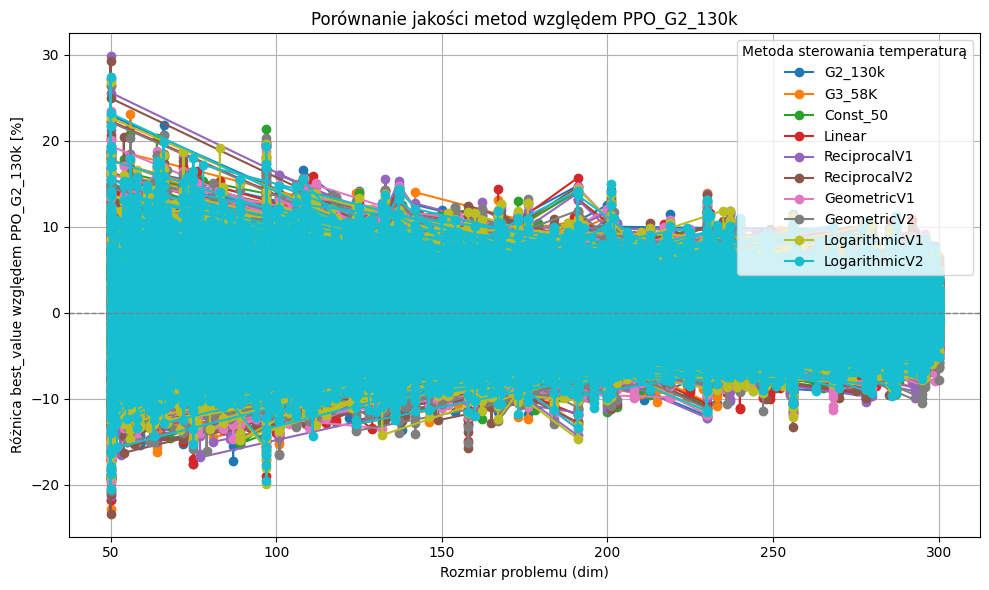

In [112]:
# (1) Tworzymy nową kolumnę: % różnicy względem PPO_G2_130k
df_pct = df.copy()

# Łączymy oryginalne z wersją PPO_G2
ppo_ref = df[df['ts_name'] == 'G3_Best1'][['dim', 'best_value']].rename(columns={'best_value': 'ppo_value'})

# (2) Merge po dim: każdemu wierszowi dodajemy wartość PPO_G2_130k z tego samego wymiaru
df_pct = df_pct.merge(ppo_ref, on='dim')

# (3) Obliczamy % różnicy
df_pct['diff_pct'] = (df_pct['best_value'] - df_pct['ppo_value']) / df_pct['ppo_value'] * 100

# (4) Filtrujemy tylko metody różne od PPO_G2_130k (bo różnica = 0)
df_plot = df_pct[df_pct['ts_name'] != 'G3_Best1']

# (5) Wykres
plt.figure(figsize=(10, 6))
for method in df_plot['ts_name'].unique():
    method_data = df_plot[df_plot['ts_name'] == method]
    plt.plot(method_data['dim'], method_data['diff_pct'], marker='o', label=method)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Rozmiar problemu (dim)")
plt.ylabel("Różnica best_value względem PPO_G2_130k [%]")
plt.title("Porównanie jakości metod względem PPO_G2_130k")
plt.legend(title="Metoda sterowania temperaturą")
plt.grid(True)
plt.tight_layout()
plt.show()